<a href="https://colab.research.google.com/github/FatemehImanizadeh/AI-Course-by-SUT-/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt



# Linear
**Data Generation**


In [7]:
def Generate_Data(n, noise ):
  X = np.linspace(-15, 15, n)
  #line_function = 2.7* x + 3.2
  slope = 2.7
  intercept = 3.2
  noise = np.random.randn(n)*noise
  Y = slope*X + intercept + noise
  return X, Y



In [8]:
X, y = Generate_Data(100, 2)

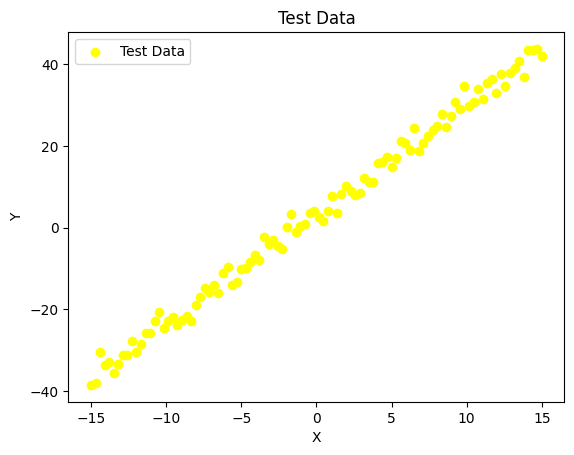

In [9]:

plt.scatter(X, y, color = 'yellow', label = "Test Data")
plt.title("Test Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


**Closed Form Solution**

---

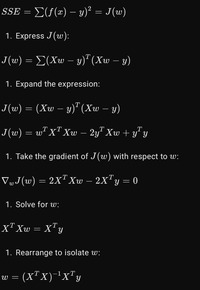

In [10]:
def closed_form(X, y):
  X_matrix = np.c_[np.ones((len(X), 1)), X]
    # w = (X^T*X)^-1* X^T*Y
  w = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y
  return w
w = closed_form(X, y)
print("W parameters:")
print(f"predicted slope = {w[1]:.2f} , predicted intercept = {w[0]:.2f}")

W parameters:
predicted slope = 2.69 , predicted intercept = 3.40


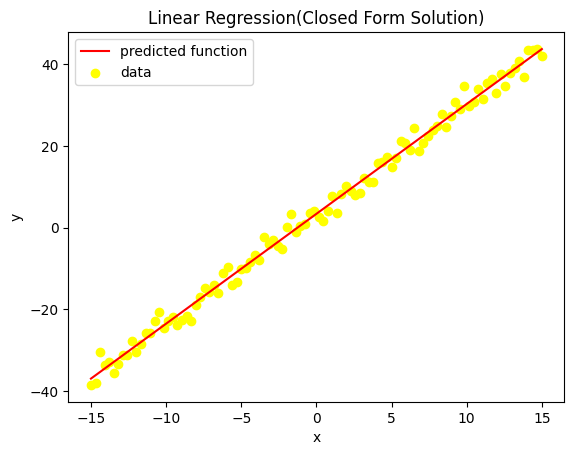

In [11]:
def f_hat(x):
  y = w[1] * x + w[0]
  return x, y

predicted_x, predicted_y = f_hat(X)
plt.plot(predicted_x, predicted_y, color='red', label = 'predicted function')
plt.scatter(X, y, color = 'yellow' , label = 'data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression(Closed Form Solution)')
plt.legend()
plt.show()


# Polynomial
**Polynomial Features**

In [12]:
def features_poly(X, degree):
  x_features = np.c_[np.ones((len(X), 1))]
  for i in range(1, degree + 1):
    x_features = np.c_[x_features, np.power(X, i)]
  return x_features
x_features = features_poly(X, 2)

In [13]:
def closed_form_poly_w(X, y, degree):
  x_features = features_poly(X, degree)
  w = np.linalg.inv(x_features.T @ x_features) @ x_features.T @ y
  return w
w = closed_form_poly_w(X, y,2)
print (w)


[3.34798910e+00 2.68937867e+00 7.09749101e-04]


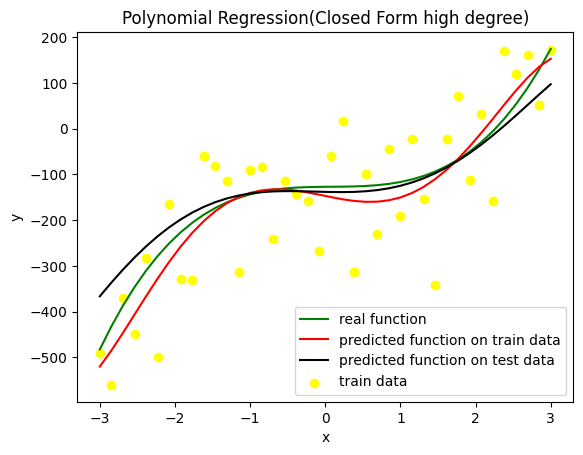

[-146.97692216  -33.76442754    2.38187609   30.33034156   -0.71712008
   -1.56856825]


In [14]:
def f_hat_poly(X , y, degree):
  w_poly = closed_form_poly_w(X, y,degree)
  x_features = features_poly(X, degree)
  predicted_Y =  x_features @ w_poly.T
  return predicted_Y
n = 25
degree = 5
X_test_poly = np.linspace(-3, 3, 40)
X_test_poly2 = np.linspace(-3, 3, 40)
noisep = 100
noise = np.random.randn(len(X_test_poly))*noisep
noise2 = np.random.randn(len(X_test_poly2))*noisep
y_test_poly = 12* X_test_poly**3 -3*X_test_poly**2 - 2*X_test_poly**0 + 1.5* X_test_poly- 125 + noise
y_test_poly2 = 12* X_test_poly2**3 -3*X_test_poly2**2 - 2*X_test_poly2**0 + 1.5* X_test_poly2- 125 + noise2
y_real = 12* X_test_poly**3 -3*X_test_poly**2 - 2*X_test_poly**0 + 1.5* X_test_poly- 125

predicted_y = f_hat_poly(X_test_poly, y_test_poly, degree)
predicted_y2 = f_hat_poly(X_test_poly2, y_test_poly2,degree)
plt.plot(X_test_poly, y_real, color='green', label = 'real function')
plt.plot(X_test_poly, predicted_y, color='red', label = 'predicted function on train data')
plt.plot(X_test_poly2, predicted_y2, color='black', label = 'predicted function on test data')

plt.scatter(X_test_poly, y_test_poly, color = 'yellow' , label = 'train data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression(Closed Form high degree)')
plt.legend()
plt.show()
w_poly = closed_form_poly_w(X_test_poly, y_test_poly,degree)
print(w_poly)
